In [1]:
import rosbag
import rospy
import yaml
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def bag_to_data(bagpath):
    jbagpath = bagpath # define path to bag file
    jbag = rosbag.Bag(jbagpath, 'r') # read bag file
    j_info_dict = yaml.load(jbag._get_yaml_info()) # load the yaml info file from the bag
    # for x in j1_info_dict['topics']:
    #     print(x)

    # topics of interest
    feedback = '/bbot/PositionJointInterface_trajectory_controller/follow_joint_trajectory/feedback'
    goal = '/bbot/PositionJointInterface_trajectory_controller/follow_joint_trajectory/goal'
    status = '/bbot/PositionJointInterface_trajectory_controller/follow_joint_trajectory/status'
    state = '/bbot/PositionJointInterface_trajectory_controller/state'
    state2 = '/bbot/joint_states'
    clock = '/clock'
    linkstates = '/gazebo/link_states'
    pid1 = '/bbot/gazebo_ros_control/pid_gains/bbot_joint_1/parameter_updates'
    pid2 = '/bbot/gazebo_ros_control/pid_gains/bbot_joint_2/parameter_updates'
    pid3 = '/bbot/gazebo_ros_control/pid_gains/bbot_joint_3/parameter_updates'
    pid4 = '/bbot/gazebo_ros_control/pid_gains/bbot_joint_4/parameter_updates'
    pid5 = '/bbot/gazebo_ros_control/pid_gains/bbot_joint_5/parameter_updates'
    pid6 = '/bbot/gazebo_ros_control/pid_gains/bbot_joint_6/parameter_updates'
    pid7 = '/bbot/gazebo_ros_control/pid_gains/bbot_joint_7/parameter_updates'
    paramupdates = '/gazebo/parameter_updates'
    paramdescription = '/gazebo/parameter_descriptions'

    # initialize vectors for plotting
    j_time = []
    j_desired = []
    j_actual = []
    j_error = []
    j_pid = np.zeros((7,3))

    # add data to vectors
    for topic, msg, type in jbag.read_messages():
        if topic == feedback:
            j_time.append(float(msg.feedback.header.stamp.secs) + float(msg.feedback.header.stamp.nsecs)/10.0**9)
            j_desired.append(msg.feedback.desired.positions)
            j_actual.append(msg.feedback.actual.positions)
            j_error.append(msg.feedback.error.positions)
#             print(msg)
        if topic == pid1:
            j_pid[0,0] = msg.doubles[0].value
            j_pid[0,1] = msg.doubles[1].value
            j_pid[0,2] = msg.doubles[2].value
        if topic == pid2:
            j_pid[1,0] = msg.doubles[0].value
            j_pid[1,1] = msg.doubles[1].value
            j_pid[1,2] = msg.doubles[2].value
        if topic == pid3:
            j_pid[2,0] = msg.doubles[0].value
            j_pid[2,1] = msg.doubles[1].value
            j_pid[2,2] = msg.doubles[2].value
        if topic == pid4:
            j_pid[3,0] = msg.doubles[0].value
            j_pid[3,1] = msg.doubles[1].value
            j_pid[3,2] = msg.doubles[2].value
        if topic == pid5:
            j_pid[4,0] = msg.doubles[0].value
            j_pid[4,1] = msg.doubles[1].value
            j_pid[4,2] = msg.doubles[2].value
        if topic == pid6:
            j_pid[5,0] = msg.doubles[0].value
            j_pid[5,1] = msg.doubles[1].value
            j_pid[5,2] = msg.doubles[2].value
        if topic == pid7:
            j_pid[6,0] = msg.doubles[0].value
            j_pid[6,1] = msg.doubles[1].value
            j_pid[6,2] = msg.doubles[2].value
    return j_time, j_desired, j_actual, j_error, j_pid;



# Joint 1

## Sim

In [3]:
j1_bagpath = 'joint1_sim_pd.bag'
j1_time, j1_desired, j1_actual, j1_error, j1_pid = bag_to_data(j1_bagpath)
j1_desired1 = [pos[0]*180./math.pi for pos in j1_desired]
j1_actual1 = [pos[0]*180./math.pi for pos in j1_actual]
j1_error1 = [pos[0]*180./math.pi for pos in j1_error]

/home/agildemeister/.local/lib/python2.7/site-packages/ipykernel_launcher.py:4: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  after removing the cwd from sys.path.


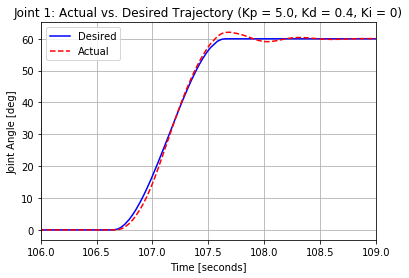

[[ 5.   0.   0.4]
 [20.   0.   1.3]
 [20.   0.   0.3]
 [ 8.   0.   0.1]
 [ 2.5  0.   0. ]
 [ 1.   0.   0.2]
 [ 0.   0.   0. ]]


In [5]:
plt.plot(j1_time, j1_desired1, 'b-', label="Desired")
plt.plot(j1_time, j1_actual1, 'r--', label="Actual")
plt.ylabel('Joint Angle [deg]')
plt.xlabel('Time [seconds]')
plt.title('Joint 1: Actual vs. Desired Trajectory (Kp = 5.0, Kd = 0.4, Ki = 0)')
plt.legend(loc="upper left")
plt.xlim(106, 109)
plt.grid()
plt.show()
print(j1_pid)

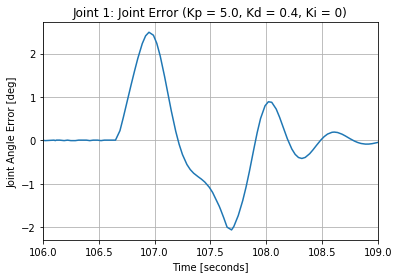

In [6]:
plt.plot(j1_time, j1_error1)
plt.ylabel('Joint Angle Error [deg]')
plt.xlabel('Time [seconds]')
plt.title('Joint 1: Joint Error (Kp = 5.0, Kd = 0.4, Ki = 0)')
plt.grid()
plt.xlim(106, 109)
plt.show()

## Real

# Joint 2

## Sim

In [3]:
j2_bagpath = 'joint2_sim_pid.bag'
j2_time, j2_desired, j2_actual, j2_error, j2_pid = bag_to_data(j2_bagpath)
j2_desired2 = [pos[1]*180./math.pi for pos in j2_desired]
j2_actual2 = [pos[1]*180./math.pi for pos in j2_actual]
j2_error2 = [pos[1]*180./math.pi for pos in j2_error]

/home/ashtin/.local/lib/python2.7/site-packages/ipykernel_launcher.py:4: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  after removing the cwd from sys.path.


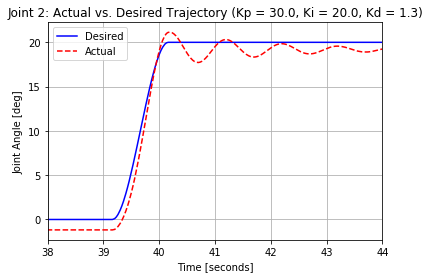

[[ 5.   0.   0.4]
 [30.  20.   1.3]
 [20.  10.   0.3]
 [ 8.   0.   0.1]
 [ 2.5  0.   0. ]
 [ 1.   0.   0.2]
 [ 0.   0.   0. ]]


In [10]:
plt.plot(j2_time, j2_desired2, 'b-', label="Desired")
plt.plot(j2_time, j2_actual2, 'r--', label="Actual")
plt.ylabel('Joint Angle [deg]')
plt.xlabel('Time [seconds]')
plt.title('Joint 2: Actual vs. Desired Trajectory (Kp = ' + str(j2_pid[1,0]) + ', Ki = ' + str(j2_pid[1,1]) + ', Kd = ' + str(j2_pid[1,2]) + ')')
plt.legend(loc="upper left")
plt.xlim(38, 44)
plt.grid()
plt.show()
print(j2_pid)

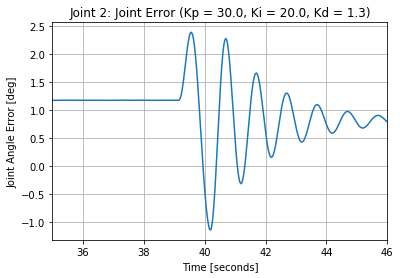

In [14]:
plt.plot(j2_time, j2_error2)
plt.ylabel('Joint Angle Error [deg]')
plt.xlabel('Time [seconds]')
plt.title('Joint 2: Joint Error (Kp = ' + str(j2_pid[1,0]) + ', Ki = ' + str(j2_pid[1,1]) + ', Kd = ' + str(j2_pid[1,2]) + ')')
plt.grid()
plt.xlim(35, 46)
plt.show()

## Real

# Joint 3

## Sim

In [11]:
j3_bagpath = 'joint3_sim_pid.bag'
j3_time, j3_desired, j3_actual, j3_error, j3_pid = bag_to_data(j3_bagpath)
j3_desired3 = [pos[2]*180./math.pi for pos in j3_desired]
j3_actual3 = [pos[2]*180./math.pi for pos in j3_actual]
j3_error3 = [pos[2]*180./math.pi for pos in j3_error]

/home/ashtin/.local/lib/python2.7/site-packages/ipykernel_launcher.py:4: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  after removing the cwd from sys.path.


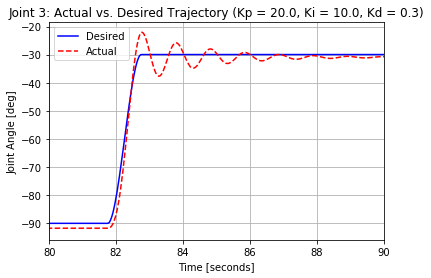

[[ 5.   0.   0.4]
 [30.  20.   1.3]
 [20.  10.   0.3]
 [ 8.   0.   0.1]
 [ 2.5  0.   0. ]
 [ 1.   0.   0.2]
 [ 0.   0.   0. ]]


In [12]:
plt.plot(j3_time, j3_desired3, 'b-', label="Desired")
plt.plot(j3_time, j3_actual3, 'r--', label="Actual")
plt.ylabel('Joint Angle [deg]')
plt.xlabel('Time [seconds]')
plt.title('Joint 3: Actual vs. Desired Trajectory (Kp = ' + str(j2_pid[2,0]) + ', Ki = ' + str(j2_pid[2,1]) + ', Kd = ' + str(j2_pid[2,2]) + ')')
plt.legend(loc="upper left")
plt.xlim(80, 90)
plt.grid()
plt.show()
print(j3_pid)

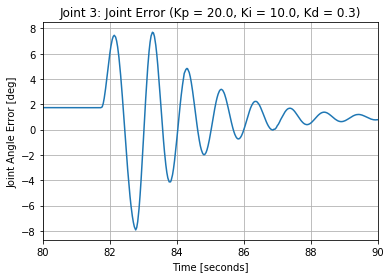

In [13]:
plt.plot(j3_time, j3_error3)
plt.ylabel('Joint Angle Error [deg]')
plt.xlabel('Time [seconds]')
plt.title('Joint 3: Joint Error (Kp = ' + str(j2_pid[2,0]) + ', Ki = ' + str(j2_pid[2,1]) + ', Kd = ' + str(j2_pid[2,2]) + ')')
plt.grid()
plt.xlim(80, 90)
plt.show()

## Real

# Joint 4

## Sim

In [14]:
j4_bagpath = 'joint4_sim_pd.bag'
j4_time, j4_desired, j4_actual, j4_error, j4_pid = bag_to_data(j4_bagpath)
j4_desired4 = [pos[3]*180./math.pi for pos in j4_desired]
j4_actual4 = [pos[3]*180./math.pi for pos in j4_actual]
j4_error4 = [pos[3]*180./math.pi for pos in j4_error]

/home/agildemeister/.local/lib/python2.7/site-packages/ipykernel_launcher.py:4: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  after removing the cwd from sys.path.


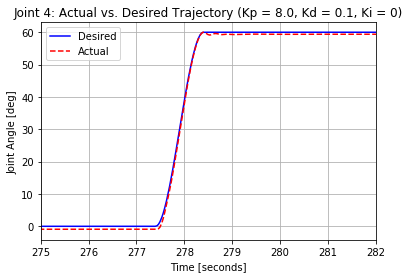

[[ 5.   0.   0.4]
 [20.   0.   1.3]
 [20.   0.   0.3]
 [ 8.   0.   0.1]
 [ 2.5  0.   0. ]
 [ 1.   0.   0.2]
 [ 0.   0.   0. ]]


In [16]:
plt.plot(j4_time, j4_desired4, 'b-', label="Desired")
plt.plot(j4_time, j4_actual4, 'r--', label="Actual")
plt.ylabel('Joint Angle [deg]')
plt.xlabel('Time [seconds]')
plt.title('Joint 4: Actual vs. Desired Trajectory (Kp = 8.0, Kd = 0.1, Ki = 0)')
plt.legend(loc="upper left")
plt.xlim(275, 282)
plt.grid()
plt.show()
print(j4_pid)

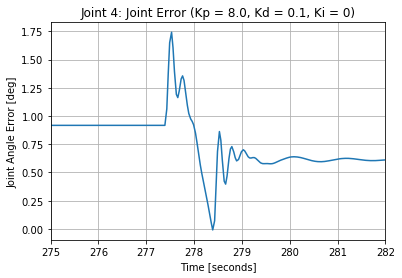

In [17]:
plt.plot(j4_time, j4_error4)
plt.ylabel('Joint Angle Error [deg]')
plt.xlabel('Time [seconds]')
plt.title('Joint 4: Joint Error (Kp = 8.0, Kd = 0.1, Ki = 0)')
plt.grid()
plt.xlim(275, 282)
plt.show()

## Real

# Joint 5

## Sim

In [18]:
j5_bagpath = 'joint5_sim_pd.bag'
j5_time, j5_desired, j5_actual, j5_error, j5_pid = bag_to_data(j5_bagpath)
j5_desired5 = [pos[4]*180./math.pi for pos in j5_desired]
j5_actual5 = [pos[4]*180./math.pi for pos in j5_actual]
j5_error5 = [pos[4]*180./math.pi for pos in j5_error]

/home/agildemeister/.local/lib/python2.7/site-packages/ipykernel_launcher.py:4: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  after removing the cwd from sys.path.


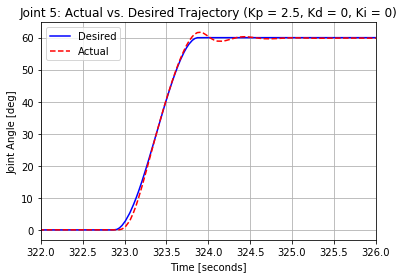

[[ 5.   0.   0.4]
 [20.   0.   1.3]
 [20.   0.   0.3]
 [ 8.   0.   0.1]
 [ 2.5  0.   0. ]
 [ 1.   0.   0.2]
 [ 0.   0.   0. ]]


In [20]:
plt.plot(j5_time, j5_desired5, 'b-', label="Desired")
plt.plot(j5_time, j5_actual5, 'r--', label="Actual")
plt.ylabel('Joint Angle [deg]')
plt.xlabel('Time [seconds]')
plt.title('Joint 5: Actual vs. Desired Trajectory (Kp = 2.5, Kd = 0, Ki = 0)')
plt.legend(loc="upper left")
plt.xlim(322, 326)
plt.grid()
plt.show()
print(j5_pid)

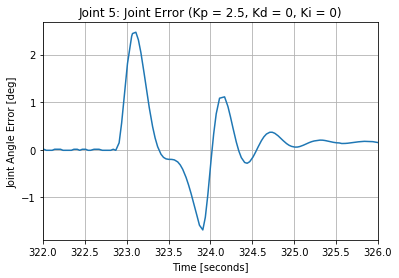

In [21]:
plt.plot(j5_time, j5_error5)
plt.ylabel('Joint Angle Error [deg]')
plt.xlabel('Time [seconds]')
plt.title('Joint 5: Joint Error (Kp = 2.5, Kd = 0, Ki = 0)')
plt.grid()
plt.xlim(322, 326)
plt.show()

## Real

# Joint 6

## Sim

In [22]:
j6_bagpath = 'joint6_sim_pd.bag'
j6_time, j6_desired, j6_actual, j6_error, j6_pid = bag_to_data(j6_bagpath)
j6_desired6 = [pos[5]*180./math.pi for pos in j6_desired]
j6_actual6 = [pos[5]*180./math.pi for pos in j6_actual]
j6_error6 = [pos[5]*180./math.pi for pos in j6_error]

/home/agildemeister/.local/lib/python2.7/site-packages/ipykernel_launcher.py:4: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  after removing the cwd from sys.path.


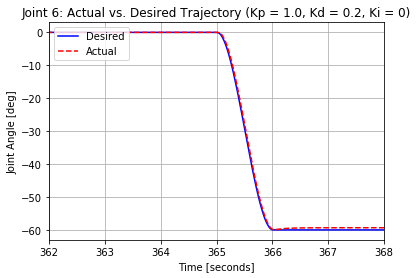

[[ 5.   0.   0.4]
 [20.   0.   1.3]
 [20.   0.   0.3]
 [ 8.   0.   0.1]
 [ 2.5  0.   0. ]
 [ 1.   0.   0.2]
 [ 0.   0.   0. ]]


In [23]:
plt.plot(j6_time, j6_desired6, 'b-', label="Desired")
plt.plot(j6_time, j6_actual6, 'r--', label="Actual")
plt.ylabel('Joint Angle [deg]')
plt.xlabel('Time [seconds]')
plt.title('Joint 6: Actual vs. Desired Trajectory (Kp = 1.0, Kd = 0.2, Ki = 0)')
plt.legend(loc="upper left")
plt.xlim(362, 368)
plt.grid()
plt.show()
print(j6_pid)

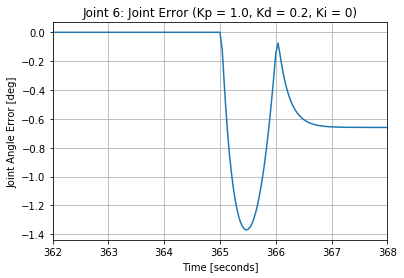

In [24]:
plt.plot(j6_time, j6_error6)
plt.ylabel('Joint Angle Error [deg]')
plt.xlabel('Time [seconds]')
plt.title('Joint 6: Joint Error (Kp = 1.0, Kd = 0.2, Ki = 0)')
plt.grid()
plt.xlim(362, 368)
plt.show()

## Real